In [1]:
# Importing libreries : 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from typing import List

# Step1 : Load and Familiarizing with Data

## a: Loading DataSet

In [2]:
def load_csv(filename):
    return pd.read_csv(f'/kaggle/input/competitive-data-science-predict-future-sales/{filename}.csv')

# Load the CSV files using the function
data_items = load_csv('items')
data_sample_submissions = load_csv('sample_submission')
data_item_categories = load_csv('item_categories')
data_sales = load_csv('sales_train')
data_shops = load_csv('shops')
data_test = load_csv('test')

## b : Familiarizing with Data

### Items

In [3]:
data_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
data_items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [5]:
data_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


### sample_submission

In [6]:
data_sample_submissions.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [7]:
data_sample_submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


### item_categories

In [8]:
data_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
data_item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


### sales_train

In [10]:
data_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
data_sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [12]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


## Shops

In [13]:
data_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
data_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### Test

In [15]:
data_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [16]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


# Step 2: Initial Data Profiling 

* ## a : checking Missing value
* ## b : checking Duplicate
* ## c : checking Outlier

##

## checking Missing value¶

* List of Data set which needs to be check = [data_items , data_item_categories , data_sales , data_shops ]

---> And why we did not consider sample and test ? Because sample has been created for just purpose of example and test is for testing the resualt so missing value would be meaningfull.

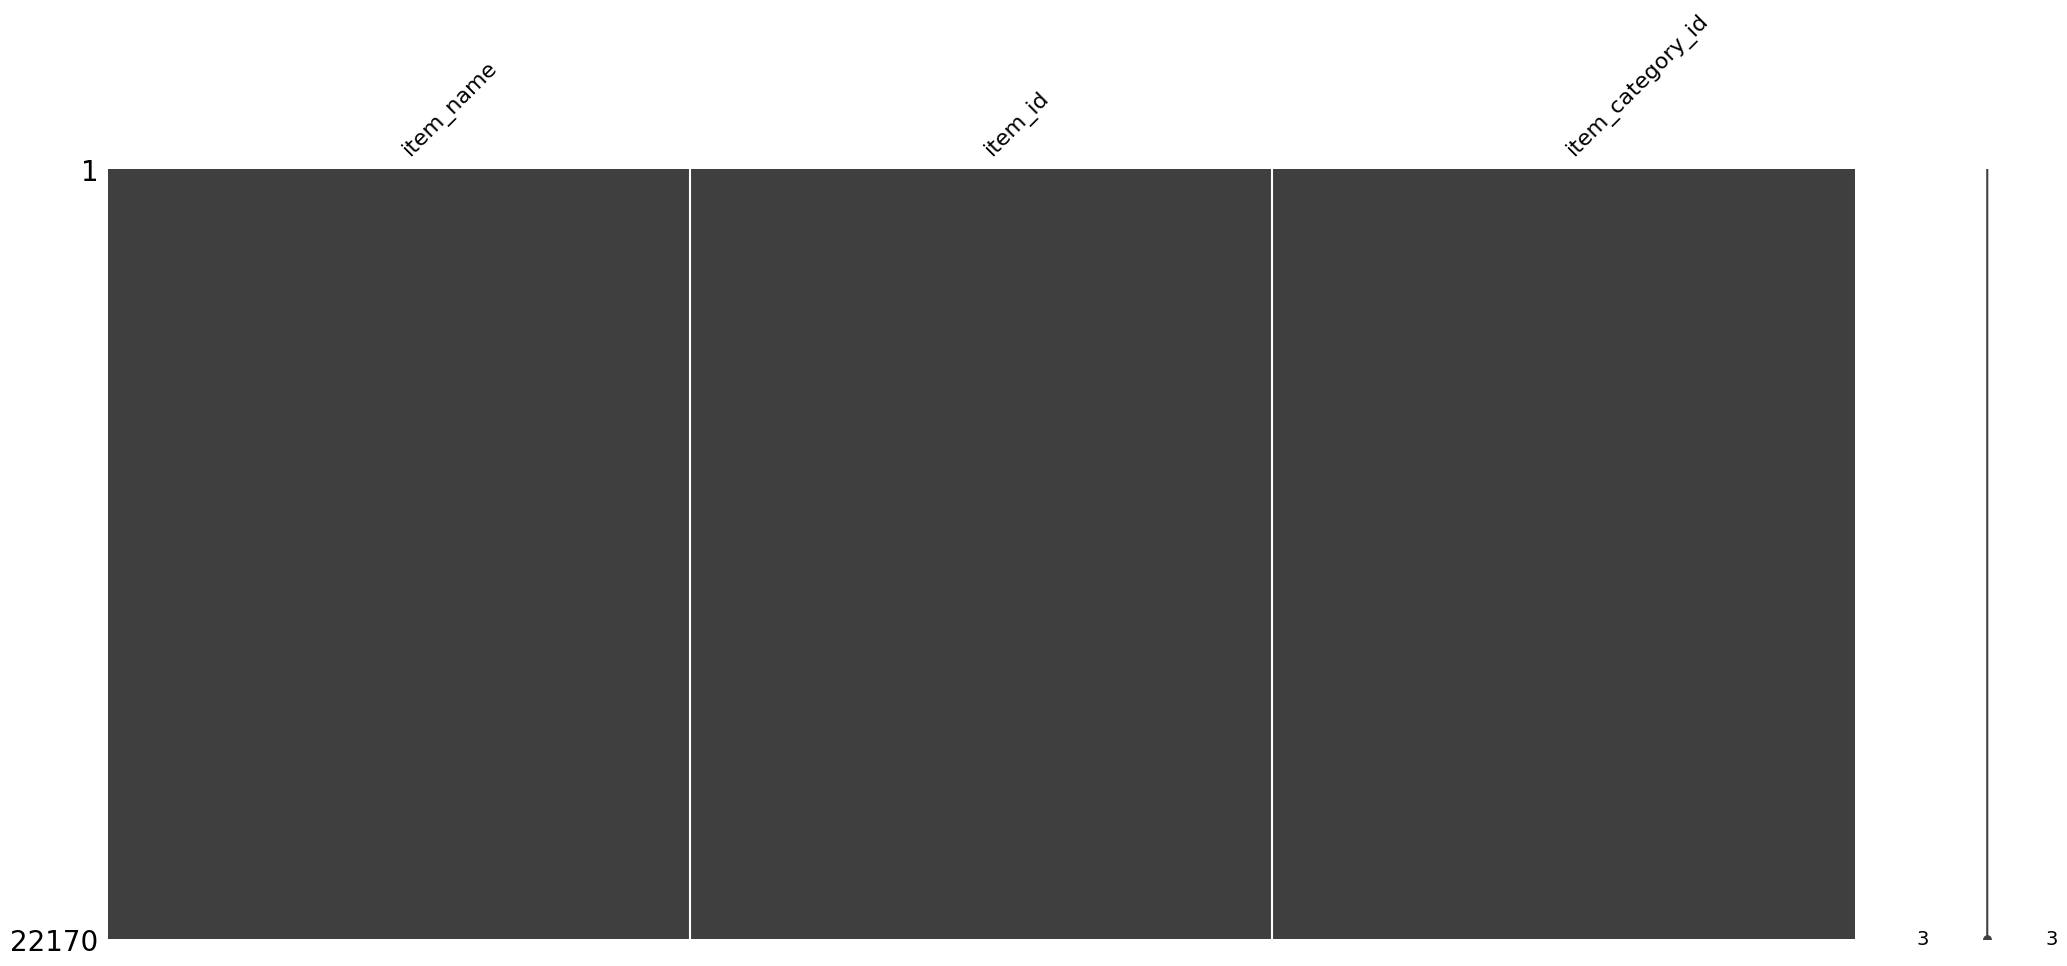

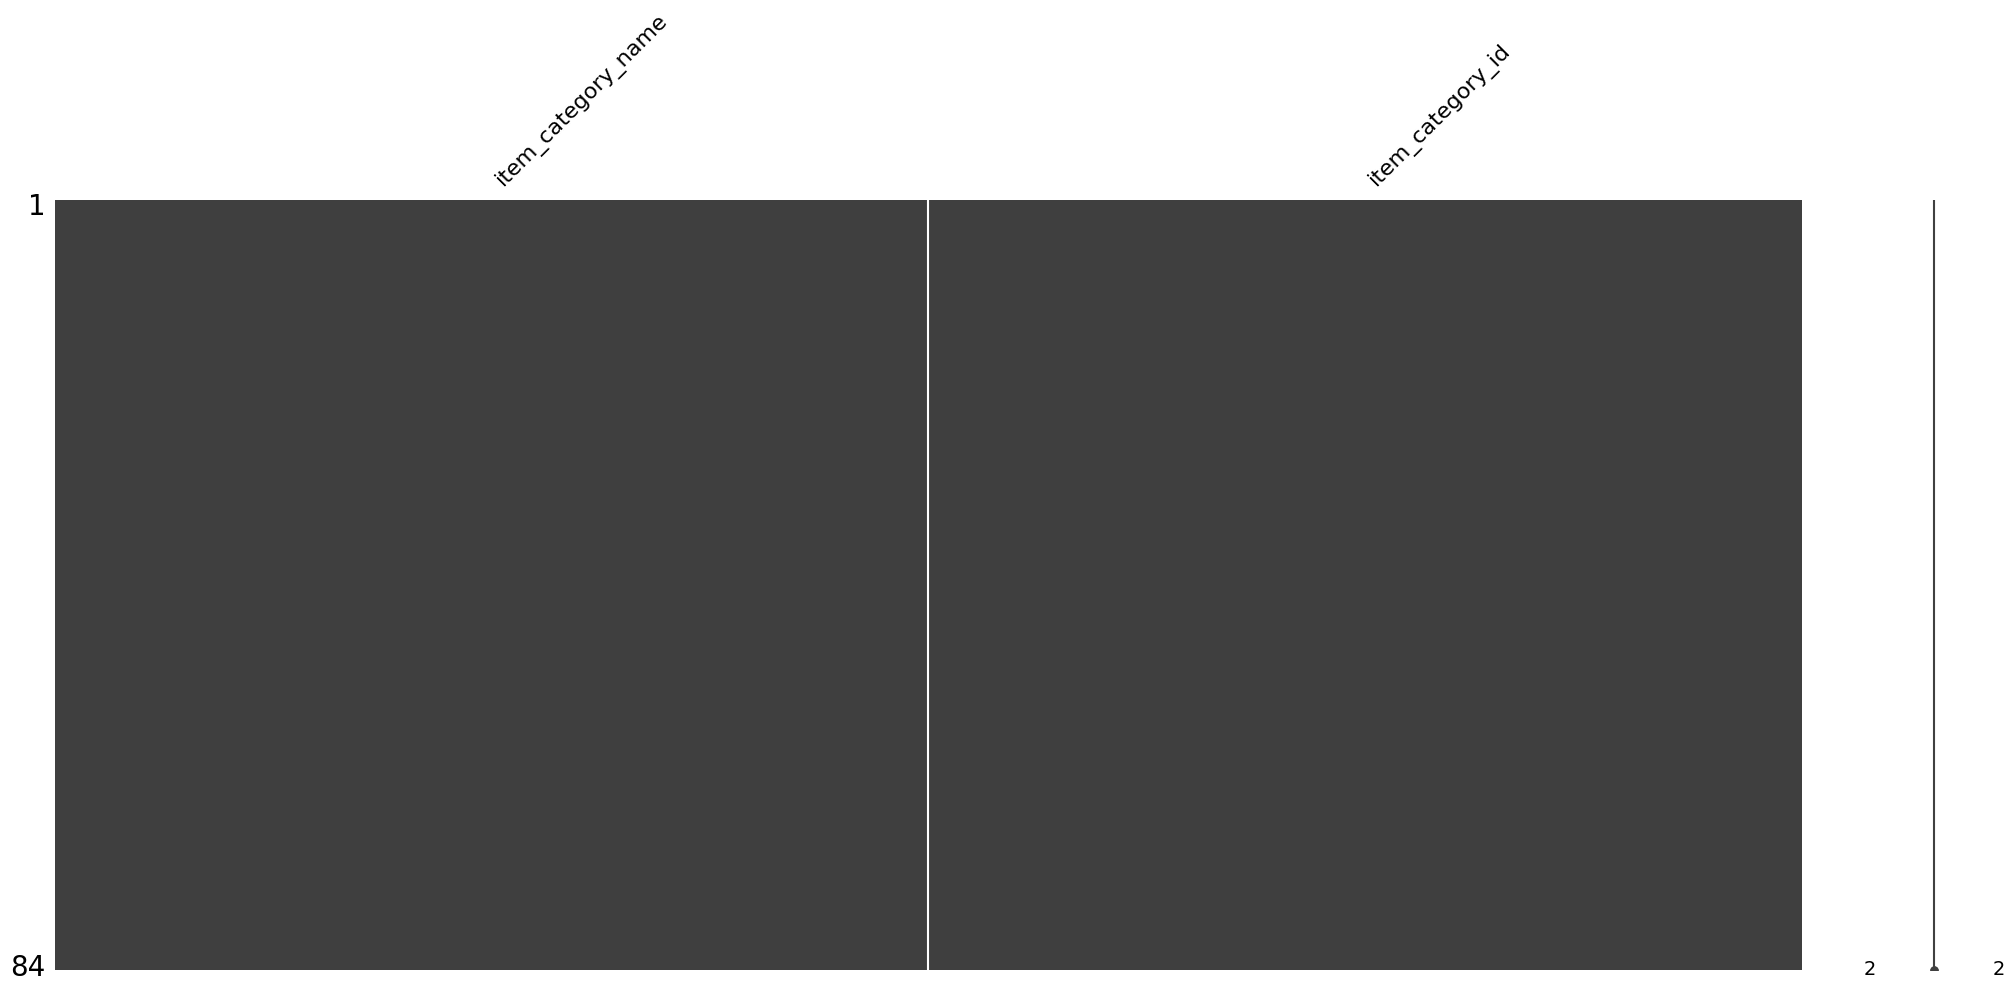

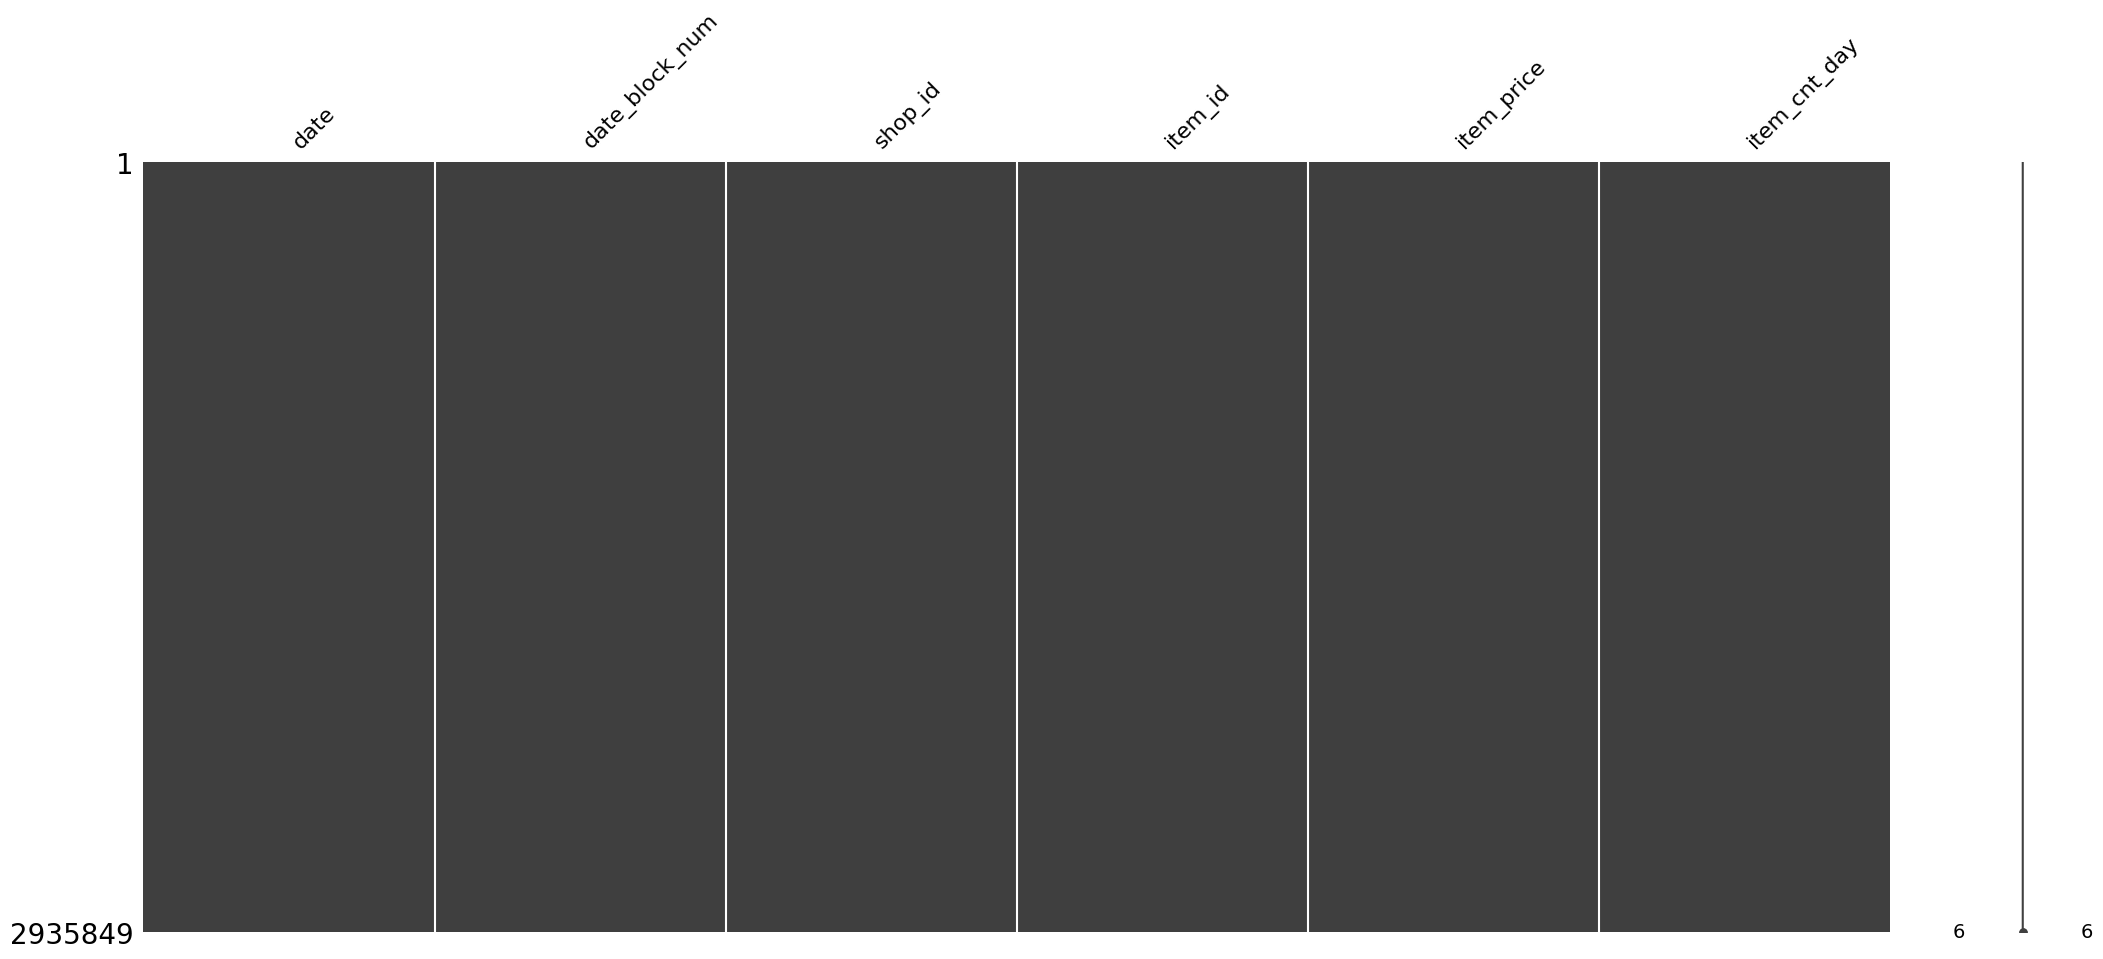

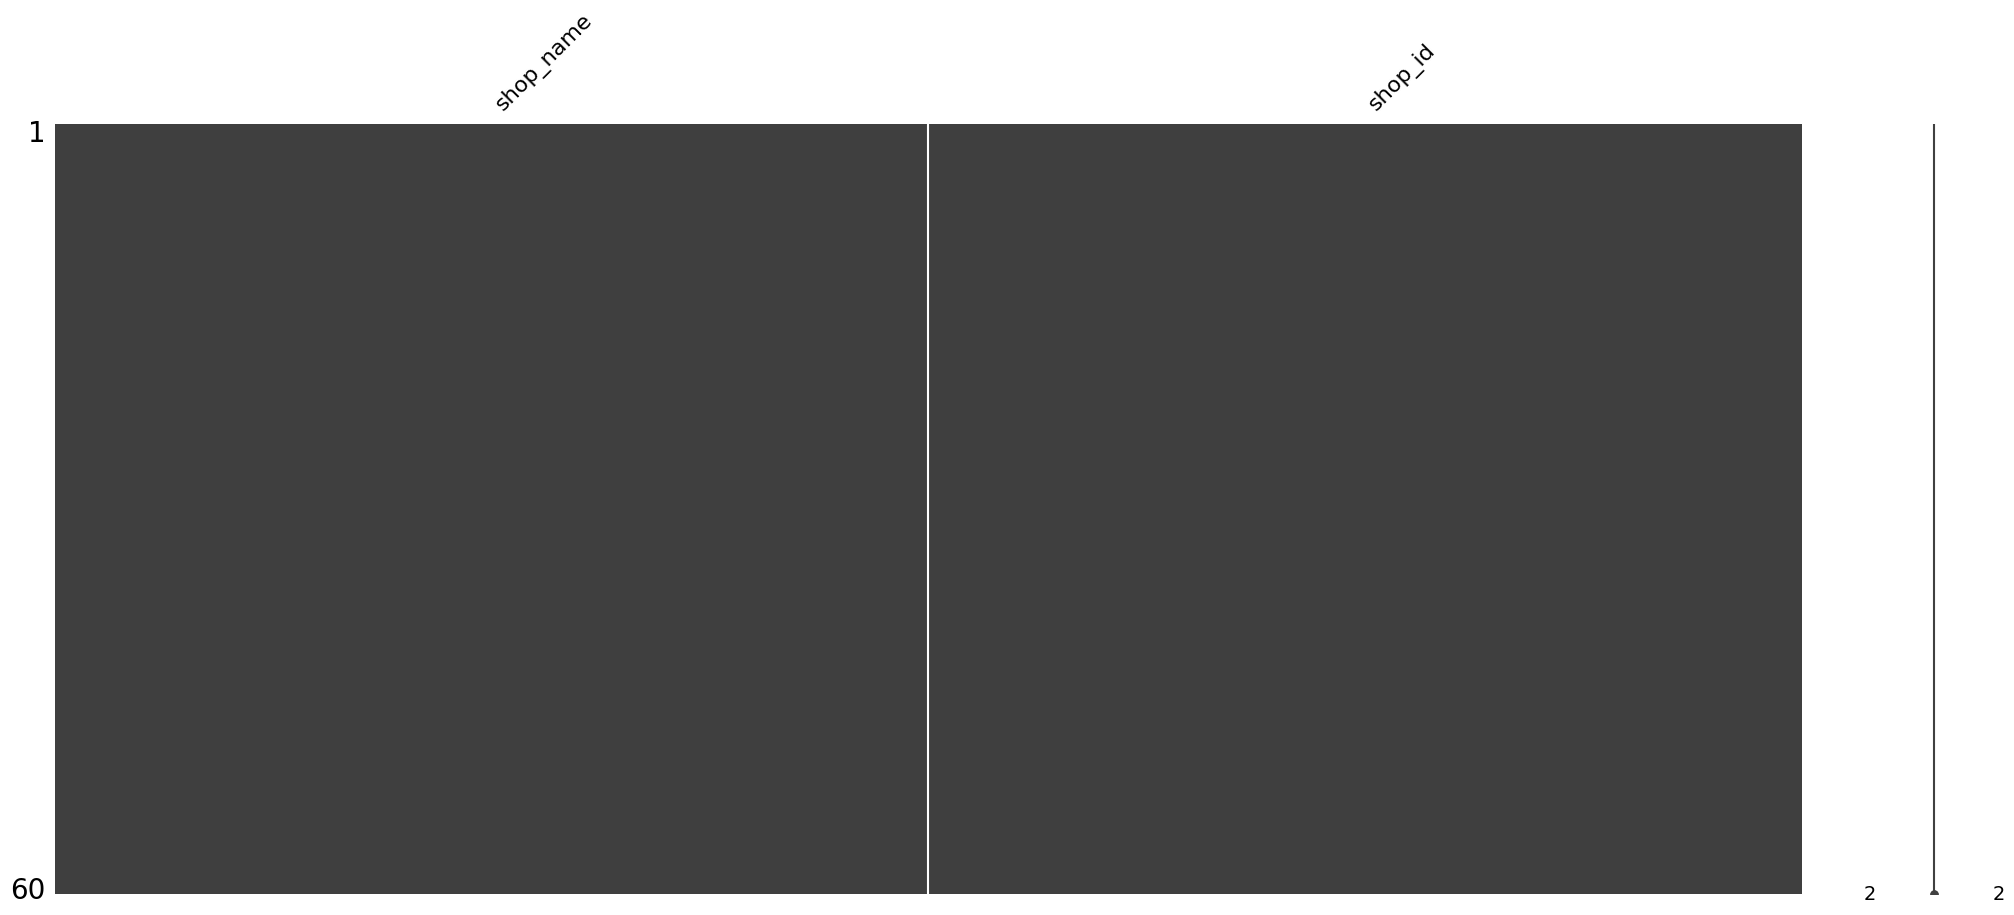

In [17]:
# Using msno matrix for showing missing value distribution 
List_dataset_missingval_check = [data_items , data_item_categories , data_sales , data_shops]

for c in List_dataset_missingval_check:
    
    msno.matrix(c)
    plt.show()

**As we can see there are no missing value in dataset above ( before merging ) **

* ## b : checking Duplicate

In [18]:
# Making list of data and name
List_name_dfs =['items',
'sample_submission',
'item_categories',
'sales_train',
'shops',
'test']

List_dfs = [data_items,
data_sample_submissions,
data_item_categories,
data_sales,
data_shops,
data_test]

In [19]:
# Defining function for Summarize duplicate information : 

def check_duplicate(DF_LST : List[pd.DataFrame], Name_lST : List [str]) -> pd.DataFrame : 
    summary = {}
    
    for df , index in zip(DF_LST , Name_lST):
        num_duplicated = df.duplicated().sum()
        summary[index]= num_duplicated
    
    dup_sum = pd.DataFrame.from_dict(summary ,orient= 'index')   
    return dup_sum

In [20]:
check_duplicate(List_dfs , List_name_dfs)

,0
items,0
sample_submission,0
item_categories,0
sales_train,6
shops,0
test,0


**There is no duplicate data in different dataset excecpt sales train we have 6 duplicated rows  **

* ## c : checking Outlier 

In this section we are going  to analyze distribution of numeric value and check outlier


![image.png](attachment:bbe4ae20-89f8-4183-a1ac-2ba7188dde46.png)

<Axes: xlabel='item_price'>

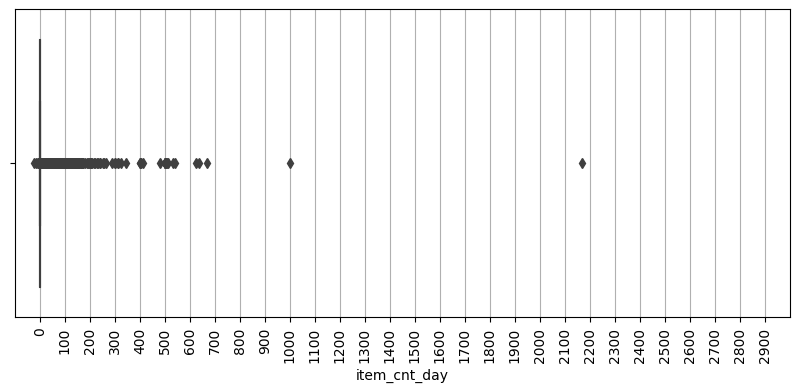

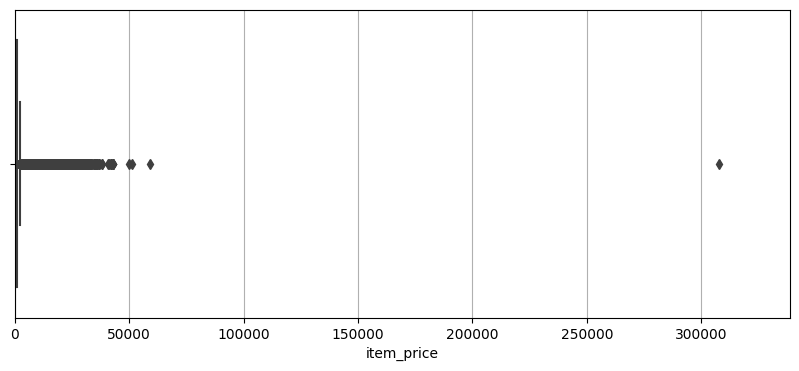

In [21]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
plt.grid()
plt.xticks(np.arange(0 ,3000 , 100),rotation = 90)
sns.boxplot(x=data_sales.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(data_sales.item_price.min(), data_sales.item_price.max()*1.1)
plt.grid()
plt.xticks()
sns.boxplot(x=data_sales.item_price)

**Checking the index of outlier :**

In [22]:
print(f'The outlier of item_cnt_day will be = {data_sales["item_id"][data_sales["item_cnt_day"] > 500].unique()}')
print(f'The outlier of item_price  will be = {data_sales["item_id"][data_sales["item_price"] > 50000].unique()}')

The outlier of item_cnt_day will be = [ 8057 20949  9242 19437  3731 11373  9249  9248]
The outlier of item_price  will be = [11365  6066 13199]


## Consistency : 

in this section , we are going to check consistency of data format in different data set

In [23]:
def inspect_dtype(DF_LST : List[pd.DataFrame], Name_lST : List [str]) -> pd.DataFrame :
    report  = {}
    for  df_name , df in zip (Name_lST , DF_LST) :
        dtype = df.infer_objects().dtypes.astype('str')
        report[df_name] = dtype
        
        result = pd.DataFrame.from_dict(report, orient ='index').fillna('_')
        
    return result

In [24]:
Consistency_Check =inspect_dtype(List_dfs , List_name_dfs) 
Consistency_Check


,item_name,item_id,item_category_id,ID,item_cnt_month,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day,shop_name
items,object,int64,int64,_,_,_,_,_,_,_,_,_
sales_train,_,int64,_,_,_,_,object,int64,int64,float64,float64,_
test,_,int64,_,int64,_,_,_,_,int64,_,_,_
item_categories,_,_,int64,_,_,object,_,_,_,_,_,_
sample_submission,_,_,_,int64,float64,_,_,_,_,_,_,_
shops,_,_,_,_,_,_,_,_,int64,_,_,object


**In this table we can see  dttype of  differnet column and in different initial data set and we can compare data  type of similar column**

## Cheking Consistency - part 2: 

**In this section we want to check if  unique value in   *[data_item_cat ,data_item --> on column item cat ]*   and   *[data_shop , data_sale --> on column shop id ]*  they converge or not**

In [25]:
def compare_unique_values(df1: pd.DataFrame, col1, df2: pd.DataFrame, col2, check_missing_in_both=True):

    unique_set1 = set(df1[col1])
    unique_set2 = set(df2[col2])

    if check_missing_in_both:
        missing_in_df1 = unique_set2 - unique_set1
        missing_in_df2 = unique_set1 - unique_set2
    else:
        missing_in_df1 = unique_set2 - unique_set1
        missing_in_df2 = []

    missing_indices_df1 = df1[df1[col1].isin(missing_in_df1)].index.tolist()
    missing_indices_df2 = df2[df2[col2].isin(missing_in_df2)].index.tolist()

    result_dict = {
        'missing_in_df1': list(missing_in_df1),
        'missing_in_df2': list(missing_in_df2),
        'missing_indices_df1': missing_indices_df1,
        'missing_indices_df2': missing_indices_df2
    }

    return result_dict

In [26]:
compare_unique_values(data_item_categories,'item_category_id',data_items,'item_category_id')


{'missing_in_df1': [],
 'missing_in_df2': [],
 'missing_indices_df1': [],
 'missing_indices_df2': []}

**Comparing item category in data iem and data item cat**

In [27]:
compare_unique_values(data_sales,'shop_id',data_shops,'shop_id')


{'missing_in_df1': [],
 'missing_in_df2': [],
 'missing_indices_df1': [],
 'missing_indices_df2': []}

**Comparing shop_id in data sales and data shops**

***As we can see  there is no miss-math in coresponding column id dataframes***

# Validity 

**In this validate if data are in validated range or  not .** 

In [28]:
def  check_df_validity (df : pd.DataFrame) :
    
    """
    This function will analyze validity of numeric value with IQR method and return outlier in data frame and index of outlier as obj
    """
    
    numeric_cols = (df.select_dtypes( exclude= ['object']).columns).values.tolist()
    print(numeric_cols)
    
    outlier_index = {}
    
    for col in numeric_cols :
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5 * IQR
        
        condition_outlier = np.logical_or(df[col]< lower_bound , df[col]> upper_bound)
        outlier = df[col][condition_outlier]
        
        percentage_of_outlier = len(outlier) / len(df[col])
        
        print(f'for column {col} , the {percentage_of_outlier:.3f} is our outlier and data frame below reperesent it {outlier} \n')
        
        outlier_index[col] = outlier.index
        
    return outlier_index
        
 
    


In [29]:
check_df_validity(data_sales)


['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']
for column date_block_num , the 0.000 is our outlier and data frame below reperesent it Series([], Name: date_block_num, dtype: int64) 

for column shop_id , the 0.000 is our outlier and data frame below reperesent it Series([], Name: shop_id, dtype: int64) 

for column item_id , the 0.000 is our outlier and data frame below reperesent it Series([], Name: item_id, dtype: int64) 

for column item_price , the 0.088 is our outlier and data frame below reperesent it 37         2699.0
38         2699.0
158        2199.0
159        2199.0
160        2199.0
            ...  
2935782    3599.0
2935802    2150.0
2935804    2890.0
2935813    4040.0
2935822    2310.0
Name: item_price, Length: 258942, dtype: float64 

for column item_cnt_day , the 0.104 is our outlier and data frame below reperesent it 2          -1.0
9           3.0
10          2.0
13          2.0
15          2.0
           ... 
2935765     4.0
2935766    35.0

{'date_block_num': Index([], dtype='int64'),
 'shop_id': Index([], dtype='int64'),
 'item_id': Index([], dtype='int64'),
 'item_price': Index([     37,      38,     158,     159,     160,     207,     209,     282,
            293,     294,
        ...
        2935763, 2935764, 2935765, 2935766, 2935781, 2935782, 2935802, 2935804,
        2935813, 2935822],
       dtype='int64', length=258942),
 'item_cnt_day': Index([      2,       9,      10,      13,      15,      47,      76,      91,
             92,      95,
        ...
        2935758, 2935760, 2935761, 2935762, 2935763, 2935765, 2935766, 2935770,
        2935779, 2935817],
       dtype='int64', length=306477)}

**> As we can see we have outlier in  item_price 0.088  and item_cnt_day  0.104**
> I used  this  function just for data_sales because for other data frame , we had item id , shop id and other kind of id and categorical data which doesn't give us much information . because id are specific and we can not perform IQR on categorical value 
